In [1]:
!pip install PyGithub
!pip install tqdm

In [0]:
import pandas as pd
import numpy as np
import calendar
import time
import sys
from github import Github
from tqdm import tqdm

In [0]:
def checkAndWait(github_yd):
  if github_yd.rate_limiting[0] <= 5:
    core_rate_limit = github_yd.get_rate_limit().core
    reset_timestamp = calendar.timegm(core_rate_limit.reset.timetuple())
    sleep_time = reset_timestamp - calendar.timegm(time.gmtime()) + 5  # add 5 seconds to be sure the rate limit has been reset
    for remaining in range(sleep_time, 0, -1):
      sys.stdout.write("\r")
      sys.stdout.write("{:2d} seconds remaining.".format(remaining))
      sys.stdout.flush()
      time.sleep(1)
    sys.stdout.write("\rComplete!            \n")

In [4]:
yd_token = '0963c426192d20332b8b090af136bc06d6791ee8'
github_yd = Github(yd_token)
checkAndWait(github_yd)
repo = github_yd.get_repo('twbs/bootstrap')
pull_requests = repo.get_pulls(state = 'closed')

print(pull_requests.totalCount)

10825


In [5]:
merged_requests = []
for pull_request in tqdm(pull_requests):
    if pull_request.merged:
        merged_requests.append(pull_request)
    checkAndWait(github_yd)
print(len(merged_requests))

4827it [34:24,  2.93it/s]

 1 seconds remaining.

4828it [53:06, 336.68s/it]

Complete!            


9655it [1:28:50,  2.77it/s]

 1 seconds remaining.

9656it [1:53:14, 439.52s/it]

Complete!            


10825it [2:01:26,  1.49it/s]

5719


In [0]:
reviews = []
for merged_request in merged_requests:
  reviews.append(merged_request.get_reviews())
  checkAndWait(github_yd)

In [7]:
smell_count = 0
for review in reviews:
  for single_review in review:
    if single_review.state != "APPROVE":
      smell_count += 1
      break
    checkAndWait(github_yd)
  checkAndWait(github_yd)
print(smell_count)

Complete!            
2300


<BarContainer object of 2 artists>

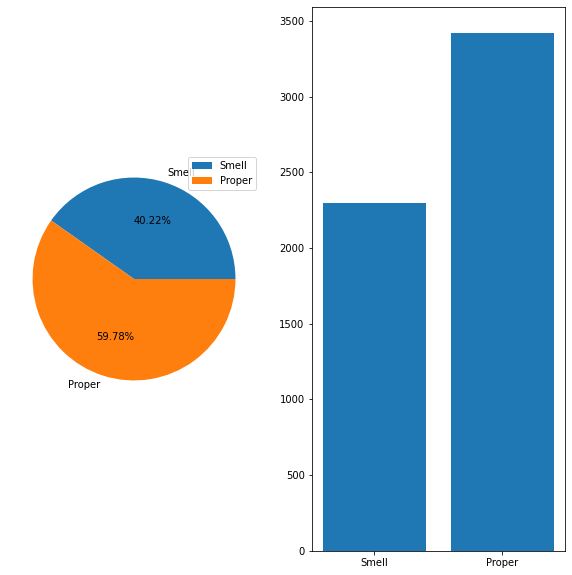

In [8]:
import matplotlib.pyplot as plt
smell_percentage = 100 * (smell_count / len(merged_requests))
data = [smell_percentage, 100 - smell_percentage]
label = ['Smell', 'Proper']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))
ax1.pie(data, labels = label, autopct = '%1.2f%%')
ax1.legend()
ax2.bar(label, [smell_count, len(merged_requests) - smell_count])